**IMPORTING LIBRARIES**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
#mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the data set
data_set = pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis.csv')

In [ ]:
#About the data set
#Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

#Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)

#Gender: The gender of the employee (Male/Female)

#Company Type: The type of company where the employee is working (Service/Product)

#WFH Setup Available: Is the work from home facility available for the employee (Yes/No)

#Designation: The designation of the employee of work in the organization.

#In the range of [0.0, 5.0] bigger is higher designation.

#Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.

#In the range of [1.0, 10.0] (higher means more resource)

#Mental Fatigue Score: The level of fatigue mentally the employee is facing.

#In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

#Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.

#In the range of [0.0, 1.0] where the higher the value is more is the burn out.

In [ ]:
data_set.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
# checking the number of rows and columns
data_set.shape

(22750, 9)

**CHECKING FOR NULL VALUES**

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
data_set.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
data_set.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
#Dropping the null values
df = pd.DataFrame(data_set,columns=['Employee ID','Date of Joining','Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score','Burn Rate'])
df = df.dropna()


In [ ]:
print(df)

                    Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200       9/30/2008  Female      Service   
1          fffe3700360033003500      11/30/2008    Male      Service   
3      fffe32003400380032003900       11/3/2008    Male      Service   
4      fffe31003900340031003600       7/24/2008  Female      Service   
5          fffe3300350037003500      11/26/2008    Male      Product   
...                         ...             ...     ...          ...   
22743      fffe3300390030003600      12/15/2008  Female      Product   
22744  fffe32003500370033003200       5/27/2008    Male      Product   
22746  fffe33003000350031003800       1/19/2008  Female      Product   
22748  fffe33003300320036003900       1/10/2008  Female      Service   
22749      fffe3400350031003800        1/6/2008    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1        

In [ ]:
df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
df.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,11/26/2008,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,1/2/2008,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,10/31/2008,Female,Service,Yes,2,4.0,4.4,0.33
10,fffe33003100330032003700,3/16/2008,Male,Product,Yes,2,3.0,5.3,0.50
11,fffe3400310035003800,5/12/2008,Male,Service,Yes,0,1.0,1.8,0.12
14,fffe33003100330036003300,5/14/2008,Male,Product,Yes,1,3.0,5.8,0.51


In [ ]:
df.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22736,fffe33003200380033003100,4/18/2008,Male,Service,Yes,4,7.0,7.7,0.65
22738,fffe31003300340032003900,12/23/2008,Male,Service,Yes,0,1.0,4.9,0.29
22739,fffe32003300350034003100,2/6/2008,Male,Service,No,2,5.0,8.5,0.67
22740,fffe33003300380031003100,9/5/2008,Female,Product,No,3,6.0,7.3,0.55
22742,fffe33003200310039003000,7/28/2008,Male,Product,No,3,5.0,8.1,0.69
22743,fffe3300390030003600,12/15/2008,Female,Product,Yes,1,3.0,6.0,0.48
22744,fffe32003500370033003200,5/27/2008,Male,Product,No,3,7.0,6.2,0.54
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,1/6/2008,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
#REMOVING THE UNWANTED DATA
data = df.drop('Employee ID',axis=1)

In [ ]:
#after removing unwanted data
data.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
3,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
5,11/26/2008,Male,Product,Yes,2,4.0,3.6,0.29
6,1/2/2008,Female,Service,No,3,6.0,7.9,0.62
7,10/31/2008,Female,Service,Yes,2,4.0,4.4,0.33
10,3/16/2008,Male,Product,Yes,2,3.0,5.3,0.50
11,5/12/2008,Male,Service,Yes,0,1.0,1.8,0.12
14,5/14/2008,Male,Product,Yes,1,3.0,5.8,0.51


**DATA ENCODING**

In [ ]:
#converting date of joining to datetime datatype
data['Date of Joining']=pd.to_datetime(data_set['Date of Joining'])
data.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,0,1,0,2,3.0,3.8,0.16
1,2008-11-30,1,1,1,1,2.0,5.0,0.36
3,2008-11-03,1,1,1,1,1.0,2.6,0.20
4,2008-07-24,0,1,0,3,7.0,6.9,0.52
5,2008-11-26,1,0,1,2,4.0,3.6,0.29
6,2008-01-02,0,1,0,3,6.0,7.9,0.62
7,2008-10-31,0,1,1,2,4.0,4.4,0.33
10,2008-03-16,1,0,1,2,3.0,5.3,0.50
11,2008-05-12,1,1,1,0,1.0,1.8,0.12
14,2008-05-14,1,0,1,1,3.0,5.8,0.51


In [ ]:
#DATA VISUALIZATION
#Building the correlation matrix
corr=data.corr()
corr

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,1.000000,-0.009289,-0.073718,0.110514,0.141089,0.145760,0.156577
Company Type,-0.009289,1.000000,-0.000756,0.008989,0.005795,0.004697,0.005904
WFH Setup Available,-0.073718,-0.000756,1.000000,-0.231858,-0.285384,-0.277683,-0.307168
Designation,0.110514,0.008989,-0.231858,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.141089,0.005795,-0.285384,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.145760,0.004697,-0.277683,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.156577,0.005904,-0.307168,0.736412,0.855005,0.944389,1.000000


<Axes: >

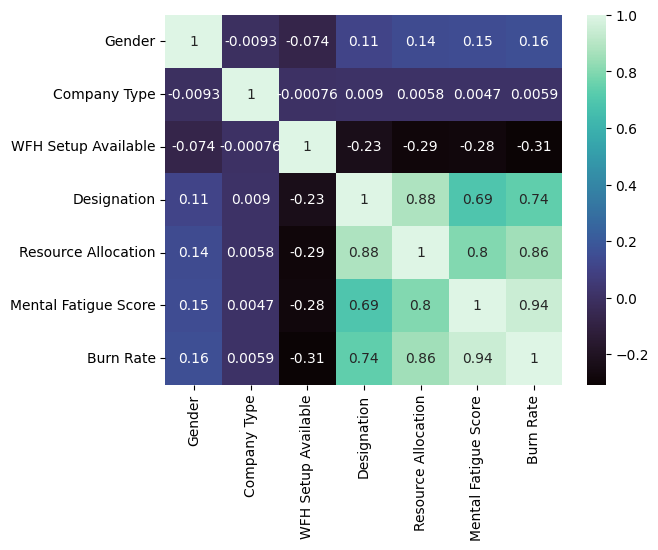

In [ ]:

sns.heatmap(corr,annot = True,cmap = 'mako')

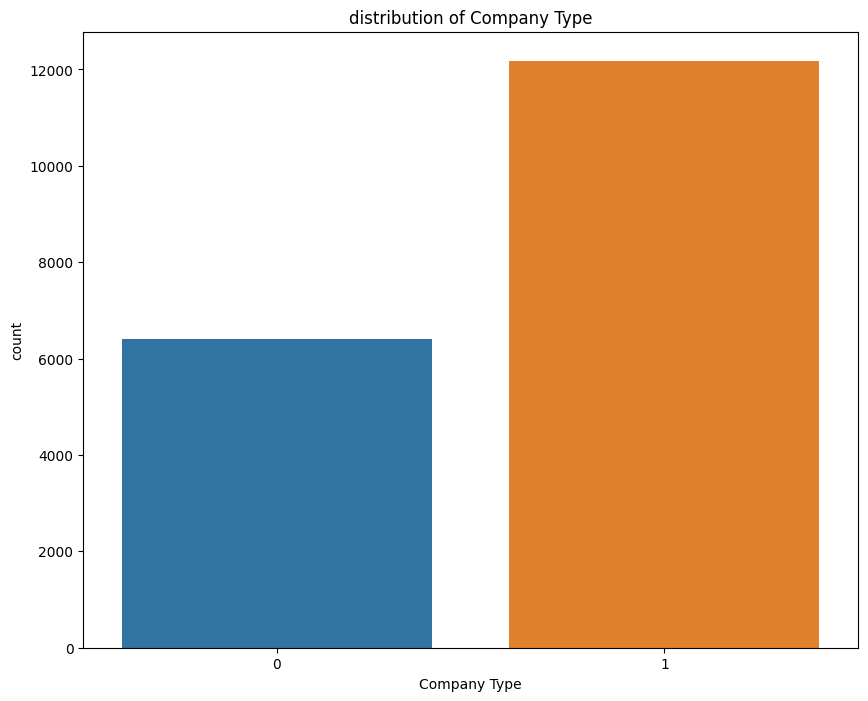

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Company Type',data=data)
plt.title('distribution of Company Type')
plt.show()

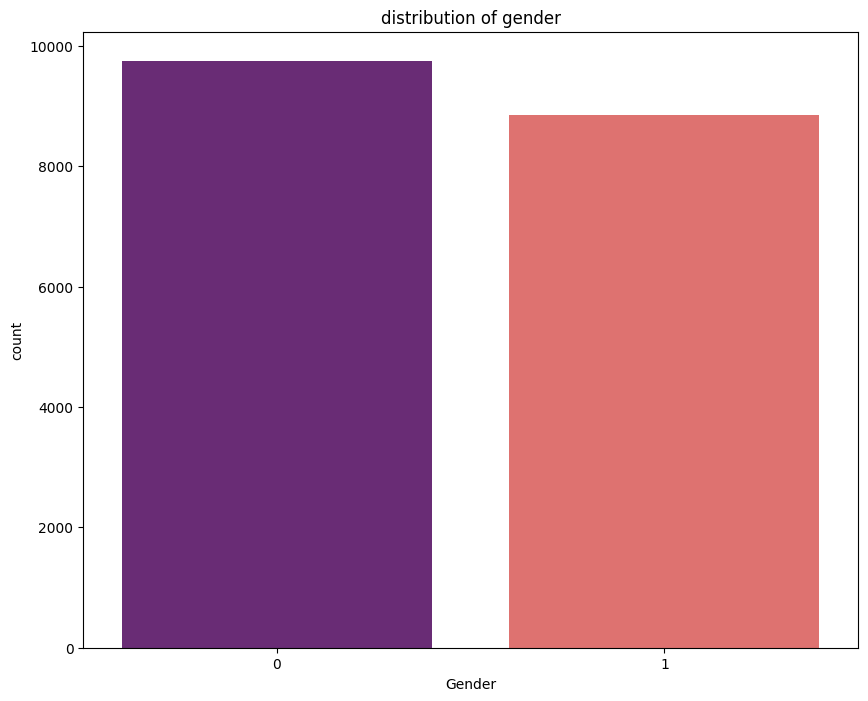

In [ ]:
#plotting the graph of gender
plt.figure(figsize=(10,8))
sns.countplot(x='Gender',data=data,palette='magma')
plt.title('distribution of gender')
plt.show()

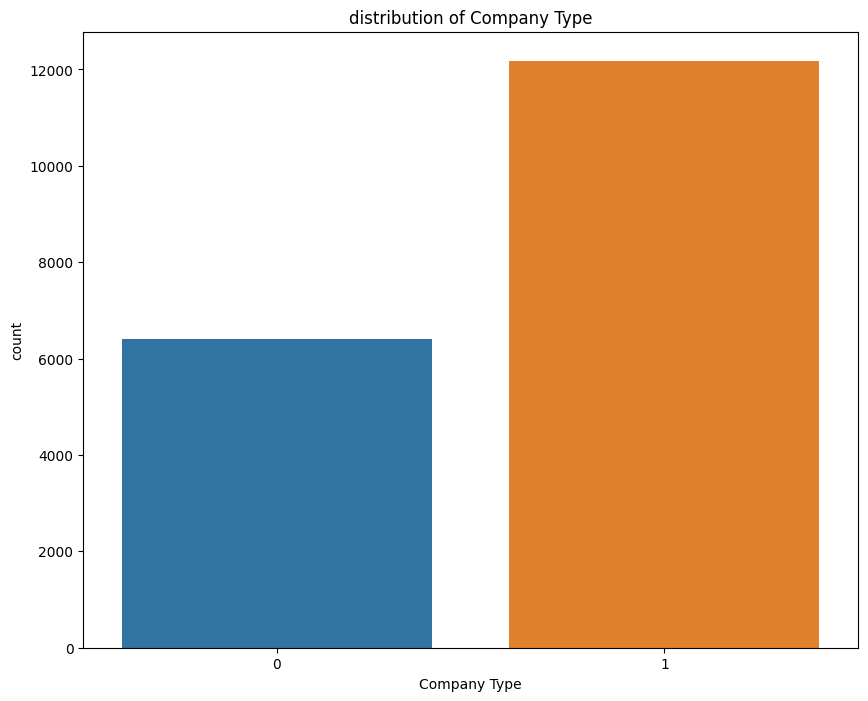

In [ ]:

#plotting the graph of company type
plt.figure(figsize=(10,8))
sns.countplot(x='Company Type',data=data)
plt.title('distribution of Company Type')
plt.show()

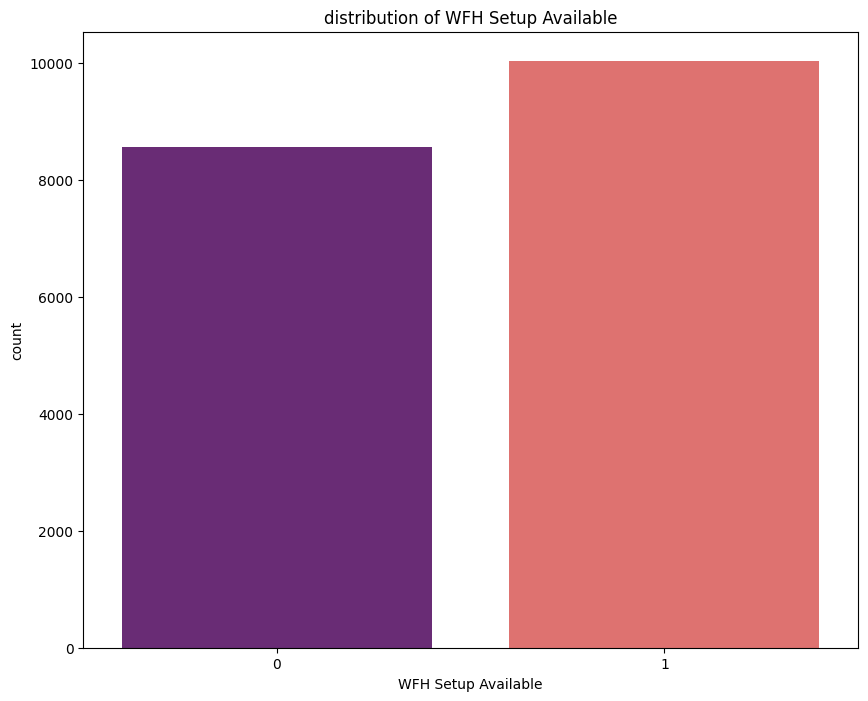

In [ ]:
#plotting the graph of WFH setup Available
plt.figure(figsize=(10,8))
sns.countplot(x='WFH Setup Available',data=data,palette='magma')
plt.title('distribution of WFH Setup Available')
plt.show()

In [ ]:
#count-plot distribution of attributes
histo=data.loc[:,'Date of Joining':'Burn Rate']
histo=histo.select_dtypes([int,float])
for i,j in enumerate(histo.columns):
  fig=px.histogram(histo,x=j,title="plot distribution of "+j,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,0,1,0,2,3.0,3.8,0.16
1,2008-11-30,1,1,1,1,2.0,5.0,0.36
3,2008-11-03,1,1,1,1,1.0,2.6,0.20
4,2008-07-24,0,1,0,3,7.0,6.9,0.52
5,2008-11-26,1,0,1,2,4.0,3.6,0.29


In [ ]:
#encoding the data
labelencoder_x = LabelEncoder()
for column in ['Gender','Company Type','WFH Setup Available']:
  data[column] = labelencoder_x.fit_transform(data[column])
print(data)

      Date of Joining  Gender  Company Type  WFH Setup Available  Designation  \
0          2008-09-30       0             1                    0            2   
1          2008-11-30       1             1                    1            1   
3          2008-11-03       1             1                    1            1   
4          2008-07-24       0             1                    0            3   
5          2008-11-26       1             0                    1            2   
...               ...     ...           ...                  ...          ...   
22743      2008-12-15       0             0                    1            1   
22744      2008-05-27       1             0                    0            3   
22746      2008-01-19       0             0                    1            3   
22748      2008-01-10       0             1                    0            2   
22749      2008-01-06       1             0                    0            3   

       Resource Allocation 

In [ ]:
#split the data into x and y
values = ['Gender','Company Type','WFH Setup Available',	'Designation','Resource Allocation','Mental Fatigue Score']
X = data[values]
y = data['Burn Rate']
X.shape, y.shape

((18590, 6), (18590,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape)

(14872, 6) (3718, 6)


**TRAINING THE MODEL**

In [ ]:
#USING RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
regressor.predict([[ 1,1,1,1,2.000000,5.000000 ]]) #predicting by taking the actual values

array([0.3041795])

In [ ]:
#predicting the test data
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2.round(5))
mse = mean_squared_error(y_test, y_pred)
print(mse.round(5))
mae = mean_absolute_error(y_test, y_pred)
print(mae.round(5))

0.91235
0.00333
0.04569


In [ ]:
X_pred = regressor.predict(X_train)
train_r2 = r2_score(y_train, X_pred)
print(train_r2.round(5))
mse = mean_squared_error(y_train, X_pred)
print(mse.round(5))
mae = mean_absolute_error(y_train, X_pred)
print(mae.round(5))

0.95141
0.00192
0.03352


In [ ]:
print('accuracy score of train data:',train_r2*100)
print('accuracy score of test data:',r2*100)

accuracy score of train data: 95.14067711579605
accuracy score of test data: 91.23458736947572


In [ ]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the test data
y_pred = regressor1.predict(X_test)
print(y_pred)

[ 0.59897887  0.64203607  0.49447315 ...  0.23461776  0.33041156
 -0.02487426]


In [ ]:
#checking the mean square error, r2 score and mean absolute error
r2 = r2_score(y_test, y_pred)
print(r2.round(5))
mse = mean_squared_error(y_test, y_pred)
print(mse.round(5))
mae = mean_absolute_error(y_test, y_pred)
print(mae.round(5))


0.91889
0.00308
0.04546


Text(0.5, 1.0, 'Actual rate vs predicted rate')

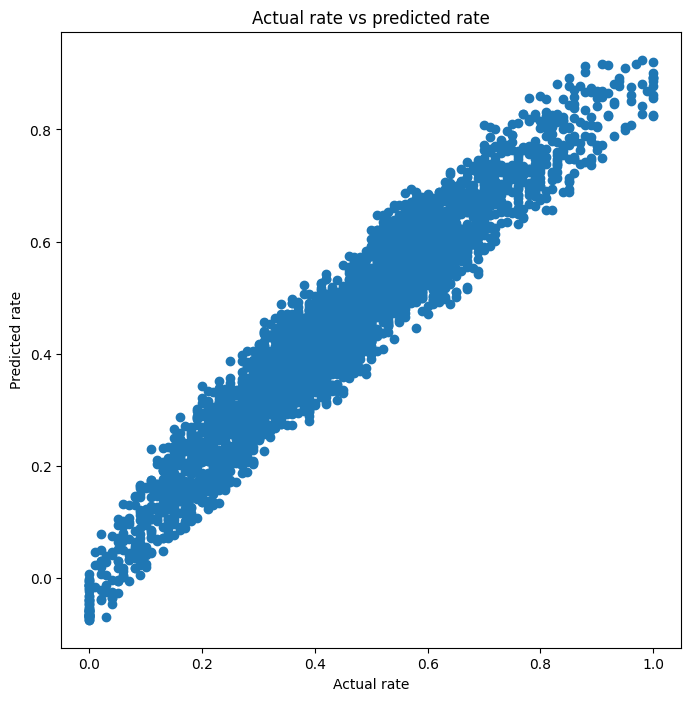

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual rate')
plt.ylabel('Predicted rate')
plt.title('Actual rate vs predicted rate')

In [ ]:
#checking the mean square error, r2 score and mean absolute error
X_pred = regressor1.predict(X_train)
train_r2 = r2_score(y_train, X_pred)
print(train_r2.round(5))
mse = mean_squared_error(y_train, X_pred)
print(mse.round(5))
mae = mean_absolute_error(y_train, X_pred)
print(mae.round(5))

0.92108
0.00311
0.04564


In [ ]:
print('accuracy score of train data:',train_r2*100)
print('accuracy score of test data:',r2*100)

accuracy score of train data: 95.14067711579605
accuracy score of test data: 91.8890801747119


In [ ]:
regressor1.predict([[ 1,1,1,1,2.000000,5.000000 ]])

array([0.33007526])

In [244]:
regressor1.predict([[ 0,1,2,0,3.000000,6.000000 ]])

array([0.42152451])

In [249]:
regressor1.predict([[ 1,1,0,1,3.000000,6.000000 ]])

array([0.44397178])